In [1]:
import numpy as np
import pylops
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl


In [13]:
D = np.load('/Volumes/backup/MSc/3d/ND_fre.npy')
# D = np.load('/Volumes/backup/MSc/3d/xinvL1_ir14_it1000.npy')
# D1 = np.load('/Volumes/backup/MSc/3d/D_cut.npy')
# fre = np.load('/Volumes/backup/MSc/3d/fre_shift_q.npy')
# xinv = np.load('/Volumes/backup/MSc/3d/D_all_q.npy')
# mask = np.load('/Volumes/backup/MSc/3d/D_aftmask_q.npy')
# relative = np.load('/Volumes/backup/MSc/3d/relative_20iter.npy')
# relative_fre = np.load('/Volumes/backup/MSc/3d/relative_fre_20iter.npy')

In [14]:
D = D.reshape(1081,281,281)
D = np.abs(np.fft.fftshift(D))

In [24]:
dx = 10
dt = 0.0025
nt,nr,ns = D.shape
# mask on Fourier domain
kn=1/(2*dx)
dk=2*kn/nr

mask_fre_loc = np.zeros((nt,nr,ns))
vel = 1450

vn = 1/(2*dt)
dv = 2*vn/nt
vs = np.arange(-vn,vn,dv)

k1 = np.zeros(nt)
k2 = np.zeros(nt)
for i in np.arange(350,540):
    k1[i] = ((-vn + i*dv)/(vel)) /dk +150
    k2[i] = ((-vn + i*dv)/(-1*vel)) /dk +150
#     mask_fre_loc[i,:,int(k1[i]):int(k2[i])] = 1
#     mask_fre_loc[i,int(k1[i]):int(k2[i]),:] = 1
    mask_fre_loc[i,int(k1[i]):int(k2[i]),int(k1[i]):int(k2[i])] = 1
for i in np.arange(540,730):
    k1[i] = ((-vn + i*dv)/(vel) ) /dk +150
    k2[i] = ((-vn + i*dv)/(-1*vel) ) /dk +150
#     mask_fre_loc[i,:,int(k2[i]):int(k1[i])] = 1
#     mask_fre_loc[i,int(k2[i]):int(k1[i]),:] = 1
    mask_fre_loc[i,int(k2[i]):int(k1[i]),int(k2[i]):int(k1[i])] = 1
    
mask_fre_loc[300:350,:,:]=1
mask_fre_loc[730:780,:,:]=1
mask_fre_loc = np.fft.ifftshift(mask_fre_loc)
mask_fre = pylops.Diagonal(mask_fre_loc)
mask = np.fft.fftshift(mask_fre_loc)

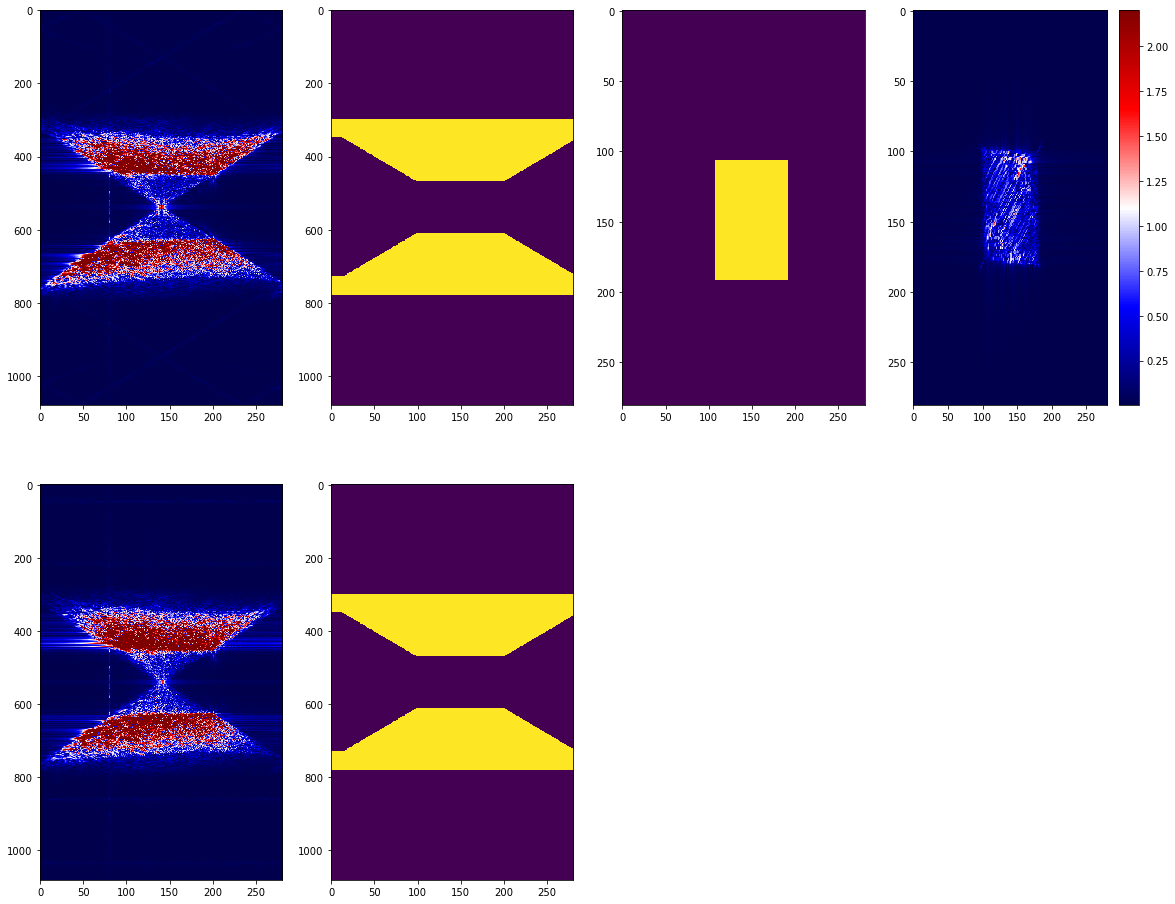

In [28]:
ks = 200
omega = 600

fig = plt.figure(figsize = (20,16))
gs = gridspec.GridSpec(2, 4)
ax1 = plt.subplot(gs[2])
ax1.imshow(mask[omega,:,:],aspect='auto')
ax2 = plt.subplot(gs[0])
im1 = ax2.imshow(np.abs(D[:,:,ks]),cmap='seismic',aspect='auto',vmin=0,vmax=0.1)
# cbar = plt.colorbar(im1)
ax3= plt.subplot(gs[1])
ax3.imshow(mask[:,:,ks],aspect='auto')
ax4 = plt.subplot(gs[3])
im2 = ax4.imshow(np.abs(D[omega,:,:]),cmap='seismic',aspect='auto')
cbar = plt.colorbar(im2)
ax2 = plt.subplot(gs[4])
im1 = ax2.imshow(np.abs(D[:,ks,:]),cmap='seismic',aspect='auto',vmin=0,vmax=0.1)
# cbar = plt.colorbar(im1)
ax3= plt.subplot(gs[5])
ax3.imshow(mask[:,ks,:],aspect='auto')

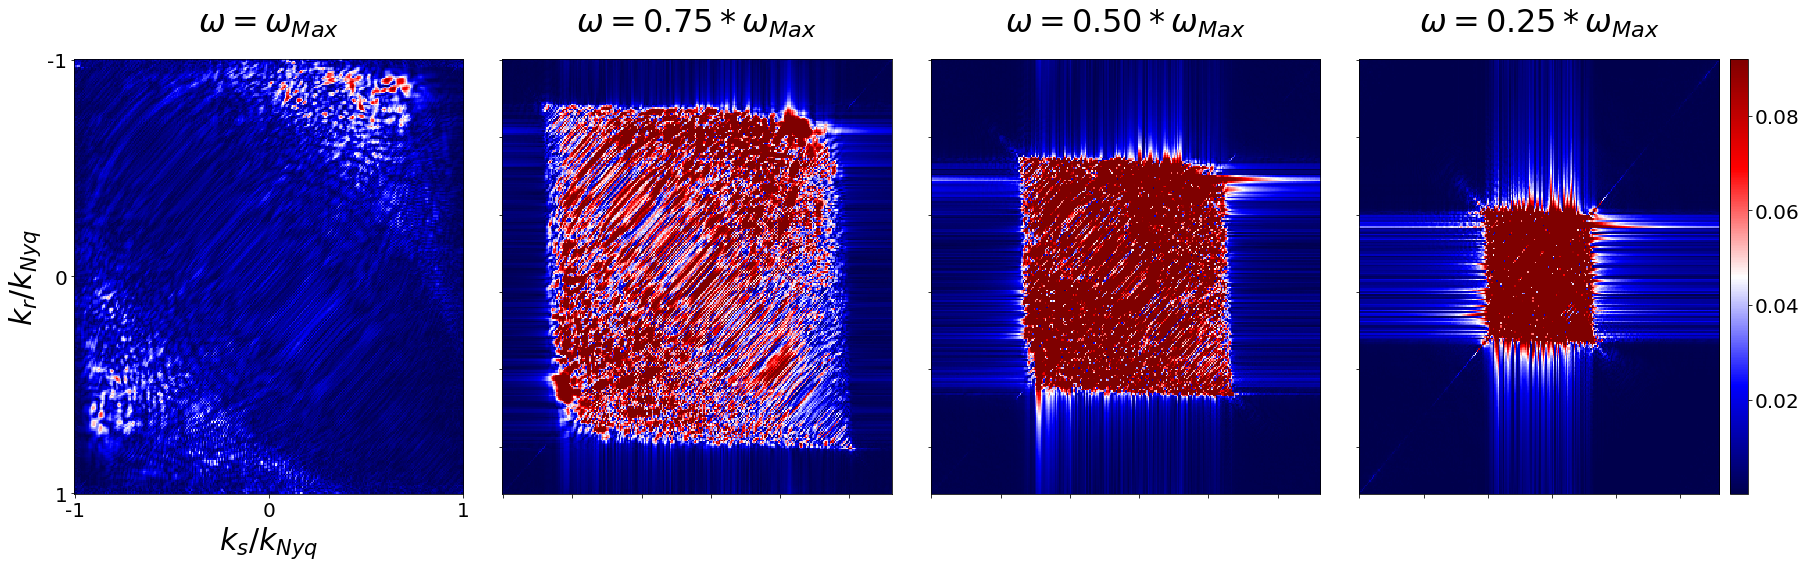

In [8]:
xticks = np.array([0,nr//2,nr-1])
yticks = np.array([0,nr//2,nr-1])
xlabels = np.array([-1,0,1])
ylabels = np.array([-1,0,1])

omega = 750
gap = 50
vmin = np.amin(np.abs(D[omega,:,:]))
vmax = np.amax(np.abs(D[omega,:,:]))
fig = plt.figure(figsize = (30,8))
gs = gridspec.GridSpec(1, 4,wspace=0.10)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
ax1.imshow(np.abs(D[omega,:,:]),cmap='seismic',aspect='auto',vmin=vmin,vmax=vmax)
ax1.set_xlabel(r'$k_s/k_{Nyq}$', fontsize=30)
ax1.set_ylabel(r'$k_r/k_{Nyq}$', fontsize=30)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels)
ax1.set_yticks(yticks)
ax1.set_yticklabels(ylabels)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax1.set_title(r'$\omega = \omega_{Max}$',y=1.05,fontsize=32)

ax2.imshow(np.abs(D[omega-gap,:,:]),cmap='seismic',aspect='auto',vmin=vmin,vmax=vmax)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_title(r'$\omega = 0.75*\omega_{Max}$',y=1.05,fontsize=32)

ax3.imshow(np.abs(D[omega-2*gap,:,:]),cmap='seismic',aspect='auto',vmin=vmin,vmax=vmax)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_title(r'$\omega = 0.50*\omega_{Max}$',y=1.05,fontsize=32)

im = ax4.imshow(np.abs(D[omega-3*gap,:,:]),cmap='seismic',aspect='auto',vmin=vmin,vmax=vmax)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.set_title(r'$\omega = 0.25*\omega_{Max}$',y=1.05,fontsize=32)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=20) 

fig.savefig('3dfre.eps', format='eps', dpi=100,bbox_inches='tight')